In [2]:
"""
In this notebook ,I try PCA visualization on a corpus.
Download some text from wikipedia.
Do PCA dimension reduction and scatter.
Results are not so meaningful for a small set.
I will use this as a basis for other projects.
"""
import wikipedia
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.corpora import Dictionary
import nltk
import string

from sklearn.decomposition import PCA
from matplotlib import pyplot
import gensim
from gensim.models import Word2Vec
#!pip install wikipedia

In [3]:
nltk.download('punkt')
nltk.download('stop')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading stop: Package 'stop' not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
  stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
  return normalized

def download_from_wiki(keywords):
  splits = keywords.split(",")
  sentences = []
  for split in splits:
    try:
      sentences.append(wikipedia.summary( split ))
    except:
      print("error ",split) 
  return sentences

In [4]:
japan_states = "Hokkaidō,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tōkyō,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyōto,Ōsaka,Hyōgo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kōchi,Fukuoka,Saga,Nagasaki,Kumamoto,Ōita,Miyazaki,Kagoshima,Okinawa"

japan_sentences = download_from_wiki( japan_states )


In [6]:
#remove stop_words
def remove_stopwords_(original_text):
  stop_words = stopwords.words('english')
  return remove_stopwords(original_text,stop_words)
  
def remove_stopwords(original_text,stop_words):
  new_tokens=[]
  # Tokenize
  all_tokens=nltk.word_tokenize(original_text)
  for token in all_tokens:
    if token not in stop_words:
      new_tokens.append(token)
  return " ".join(new_tokens)

In [19]:
all_tokens=[]
for text in japan_sentences:  
  text_without_words = remove_stopwords_(text)
  raw=nltk.wordpunct_tokenize(text_without_words)
  for token in raw:
    if len(token) > 4:
      sublist = []
      #insert as a list inside list
      sublist.append(token)
      all_tokens.append(sublist)

In [20]:
# Import and fit the model with data

model=Word2Vec(all_tokens)

In [21]:
model.wv.vocab

{'Academy': <gensim.models.keyedvectors.Vocab at 0x7fa4cf7d7b38>,
 'Aichi': <gensim.models.keyedvectors.Vocab at 0x7fa4d5f805f8>,
 'Castle': <gensim.models.keyedvectors.Vocab at 0x7fa4d5f80518>,
 'China': <gensim.models.keyedvectors.Vocab at 0x7fa4d5f2a278>,
 'Chinese': <gensim.models.keyedvectors.Vocab at 0x7fa4d19a0400>,
 'Chūgoku': <gensim.models.keyedvectors.Vocab at 0x7fa4d5f80978>,
 'Ehime': <gensim.models.keyedvectors.Vocab at 0x7fa4d5f80b70>,
 'Fukuoka': <gensim.models.keyedvectors.Vocab at 0x7fa4d5f80ba8>,
 'Greater': <gensim.models.keyedvectors.Vocab at 0x7fa4d5f80358>,
 'Gunma': <gensim.models.keyedvectors.Vocab at 0x7fa4cf7d7e80>,
 'Hiroshima': <gensim.models.keyedvectors.Vocab at 0x7fa4d5f80a20>,
 'Hokkaido': <gensim.models.keyedvectors.Vocab at 0x7fa4d60ad208>,
 'Honshu': <gensim.models.keyedvectors.Vocab at 0x7fa4cf7d7f28>,
 'Hyōgo': <gensim.models.keyedvectors.Vocab at 0x7fa4d5f80710>,
 'Imperial': <gensim.models.keyedvectors.Vocab at 0x7fa4d19a0be0>,
 'Islands': <gensi

In [22]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [23]:
print( type(result))
print( result.shape)

<class 'numpy.ndarray'>
(91, 2)


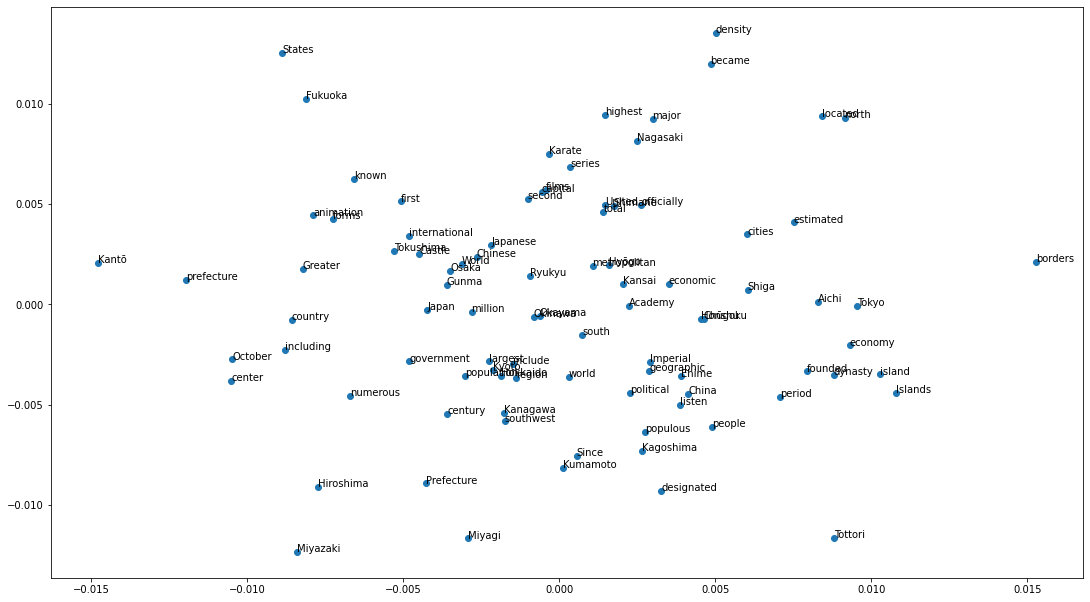

In [24]:
# create a scatter plot of the projection
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

#scatter result words
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
#put an annotation on x,y cordinates for words
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()